## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models, datasets, layers, Sequential
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, AveragePooling2D, LayerNormalization

## Data Analysis

In [2]:
iot_ds2=pd.read_csv('IoT-DS2.csv')
iot_ds2.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Bwd_IAT_Mean.1
0,6.464587e+09,3.232261e+09,64892.0,3.232261e+09,80.0,6.0,1.522984e+09,19377440.0,2.0,1.0,...,0.000000,0.0,0.0,9.688720e+06,1.637866e+06,10846866.0,8530574.0,Anomaly,DDoS,NaN
1,6.464582e+09,3.232261e+09,59992.0,3.232261e+09,80.0,6.0,1.522984e+09,22110440.0,3.0,1.0,...,0.000000,0.0,0.0,7.370147e+06,1.734992e+06,8413620.0,5367339.0,Anomaly,DDoS,NaN
2,6.464567e+09,3.232261e+09,44446.0,3.232261e+09,80.0,17.0,1.522988e+09,2851022.0,2.0,1.0,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Anomaly,DDoS,NaN
3,6.464576e+09,3.232261e+09,53936.0,3.232261e+09,80.0,6.0,1.522992e+09,16638411.0,3.0,5.0,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,Anomaly,DDoS,NaN
4,6.464578e+09,3.232261e+09,55650.0,3.232261e+09,80.0,6.0,1.522984e+09,24702225.0,6.0,4.0,...,7354.617631,152124.0,141723.0,9.614084e+06,1.938831e+06,10985044.0,8243123.0,Anomaly,DDoS,NaN


In [3]:
iot_ds2.describe()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Bwd_IAT_Mean.1
count,1.438157e+06,1.438157e+06,1.438157e+06,1.438157e+06,1.438157e+06,1.438157e+06,1.438157e+06,1.438157e+06,1.438157e+06,1.438157e+06,...,1.438157e+06,1.438157e+06,1.438157e+06,1.438157e+06,1.438157e+06,1.438157e+06,1.438157e+06,1.438157e+06,1.438157e+06,0.0
mean,5.854424e+09,3.070209e+09,3.211949e+04,2.784170e+09,1.208098e+04,7.181201e+00,1.539321e+09,1.083106e+07,6.591133e+00,1.682093e+00,...,1.553709e+01,2.920751e+05,2.583981e+04,3.111786e+05,2.739665e+05,4.474743e+14,1.798012e+13,4.548330e+14,4.098938e+14,NaN
std,1.062464e+09,6.743420e+08,1.966342e+04,8.913733e+08,1.860199e+04,3.432393e+00,2.046594e+07,1.886426e+07,9.888050e+02,3.960986e+00,...,1.590375e+01,1.394257e+06,2.886992e+05,1.441185e+06,1.379695e+06,6.984397e+14,1.063015e+14,7.087831e+14,6.857153e+14,NaN
min,1.368568e+08,2.899252e+07,0.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,1.515370e+09,-1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,5.385555e+09,3.232236e+09,1.783200e+04,2.622393e+09,8.000000e+01,6.000000e+00,1.522988e+09,1.050000e+02,2.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,6.464533e+09,3.232261e+09,3.504000e+04,3.232261e+09,8.000000e+01,6.000000e+00,1.531097e+09,4.266979e+06,3.000000e+00,1.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.704928e+06,7.071068e-01,5.807565e+06,5.066030e+06,NaN
75%,6.464579e+09,3.232261e+09,4.973100e+04,3.232261e+09,1.988600e+04,6.000000e+00,1.545451e+09,1.556995e+07,4.000000e+00,2.000000e+00,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.545404e+15,2.140779e+06,1.545420e+15,1.545404e+15,NaN
max,7.527256e+09,3.802022e+09,6.553500e+04,4.294967e+09,6.553500e+04,1.700000e+01,1.626325e+09,1.200000e+08,3.412790e+05,5.600000e+02,...,5.600000e+01,2.048188e+07,1.457036e+07,2.060563e+07,2.048188e+07,1.626339e+15,1.149996e+15,1.626339e+15,1.626339e+15,NaN


In [ ]:
iot_ds2.columns.tolist()

In [4]:
iot_ds2['Cat'].unique()

array(['DDoS', 'DoS', 'MITM ARP Spoofing', 'Mirai', 'MQQT_bruteforce',
       'Reconnaissance', 'Sparta', 'Theft', 'Normal', 'Attack', 'C&C',
       'FileDownload', 'HeartBeat', 'Okiru', 'PortScan', 'Torii', 'Flood'],
      dtype=object)

In [5]:
iot_ds2['Cat'].nunique()

17

In [6]:
iot_ds=iot_ds2.drop(['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Src_Port'], axis=1)

In [7]:
x = iot_ds2.columns.tolist()
y = iot_ds2.select_dtypes(include=np.number).columns.tolist()
list(set(x)-set(y))

['Label', 'Cat']

In [8]:
Cat_map = {
    'Normal' : 0,
    'DDoS' : 1,
    'DoS' : 2,
    'MITM ARP Spoofing' : 3,
    'Mirai' : 4,
    'MQTT_bruteforce' : 5,
    'Sparta' : 6,
    'Theft' : 7,
    'Attack' : 8,
    'C&C' : 9,
    'FileDownload' : 10,
    'HeartBeat' : 11,
    'Okiru' : 12,
    'Reconnaissance' : 13,
    'Port Scan' : 14,
    'Torii' : 15,
    'Flood' : 16
}

In [9]:
iot_ds2_cat = iot_ds.drop(['Label'], axis=1)
cat_data = iot_ds2_cat['Cat'].map(Cat_map)
iot_ds2_cat['Cat'] = cat_data
print(iot_ds2_cat.head())

   Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0      80.0       6.0     19377440.0           2.0           1.0   
1      80.0       6.0     22110440.0           3.0           1.0   
2      80.0      17.0      2851022.0           2.0           1.0   
3      80.0       6.0     16638411.0           3.0           5.0   
4      80.0       6.0     24702225.0           6.0           4.0   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0            200.0            100.0            100.0            100.0   
1            300.0            100.0            100.0            100.0   
2              0.0              0.0              0.0              0.0   
3            361.0           1124.0            361.0              0.0   
4            300.0            100.0            100.0              0.0   

   Fwd_Pkt_Len_Mean  ...  Active_Mean   Active_Std  Active_Max  Active_Min  \
0        100.000000  ...          0.0     0.000000         0.0         0.0

In [10]:
Label_map = {
    'Normal' : 0,
    'Anomaly' : 1
}

iot_ds2_label = iot_ds.drop(['Cat'], axis=1)
label_data = iot_ds2_label['Label'].map(Label_map)
iot_ds2_label['Label'] = label_data
print(iot_ds2_label.head())

   Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0      80.0       6.0     19377440.0           2.0           1.0   
1      80.0       6.0     22110440.0           3.0           1.0   
2      80.0      17.0      2851022.0           2.0           1.0   
3      80.0       6.0     16638411.0           3.0           5.0   
4      80.0       6.0     24702225.0           6.0           4.0   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0            200.0            100.0            100.0            100.0   
1            300.0            100.0            100.0            100.0   
2              0.0              0.0              0.0              0.0   
3            361.0           1124.0            361.0              0.0   
4            300.0            100.0            100.0              0.0   

   Fwd_Pkt_Len_Mean  ...  Active_Mean   Active_Std  Active_Max  Active_Min  \
0        100.000000  ...          0.0     0.000000         0.0         0.0

In [11]:
iot_ds2_cat.fillna(0)

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,Bwd_IAT_Mean.1
0,80.0,6.0,19377440.0,2.0,1.0,200.0,100.0,100.0,100.0,100.000000,...,0.0,0.000000,0.0,0.0,9.688720e+06,1.637866e+06,1.084687e+07,8.530574e+06,1.0,0.0
1,80.0,6.0,22110440.0,3.0,1.0,300.0,100.0,100.0,100.0,100.000000,...,0.0,0.000000,0.0,0.0,7.370147e+06,1.734992e+06,8.413620e+06,5.367339e+06,1.0,0.0
2,80.0,17.0,2851022.0,2.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
3,80.0,6.0,16638411.0,3.0,5.0,361.0,1124.0,361.0,0.0,120.333333,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0
4,80.0,6.0,24702225.0,6.0,4.0,300.0,100.0,100.0,0.0,50.000000,...,146923.5,7354.617631,152124.0,141723.0,9.614084e+06,1.938831e+06,1.098504e+07,8.243123e+06,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438152,1883.0,6.0,130.0,16.0,1.0,23360.0,0.0,1460.0,1460.0,1460.000000,...,0.0,0.000000,0.0,0.0,1.626339e+15,2.941206e+01,1.626339e+15,1.626339e+15,16.0,0.0
1438153,1883.0,6.0,87.0,9.0,1.0,13140.0,0.0,1460.0,1460.0,1460.000000,...,0.0,0.000000,0.0,0.0,1.626339e+15,2.826185e+01,1.626339e+15,1.626339e+15,16.0,0.0
1438154,1883.0,6.0,86.0,4.0,1.0,5840.0,0.0,1460.0,1460.0,1460.000000,...,0.0,0.000000,0.0,0.0,1.626339e+15,4.680812e+01,1.626339e+15,1.626339e+15,16.0,0.0
1438155,1883.0,6.0,142.0,2.0,1.0,2920.0,0.0,1460.0,1460.0,1460.000000,...,0.0,0.000000,0.0,0.0,1.626339e+15,0.000000e+00,1.626339e+15,1.626339e+15,16.0,0.0


In [12]:
iot_ds2_cat=iot_ds2_cat.drop_duplicates()
iot_ds2_cat=iot_ds2_cat.drop(['Bwd_IAT_Mean.1'], axis=1)
print(iot_ds2_cat)

         Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0            80.0       6.0     19377440.0           2.0           1.0   
1            80.0       6.0     22110440.0           3.0           1.0   
2            80.0      17.0      2851022.0           2.0           1.0   
3            80.0       6.0     16638411.0           3.0           5.0   
4            80.0       6.0     24702225.0           6.0           4.0   
...           ...       ...            ...           ...           ...   
1438152    1883.0       6.0          130.0          16.0           1.0   
1438153    1883.0       6.0           87.0           9.0           1.0   
1438154    1883.0       6.0           86.0           4.0           1.0   
1438155    1883.0       6.0          142.0           2.0           1.0   
1438156    1883.0       6.0          102.0           2.0           1.0   

         TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0                  200.0        

In [13]:
iot_ds2_label.fillna(0)

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Bwd_IAT_Mean.1
0,80.0,6.0,19377440.0,2.0,1.0,200.0,100.0,100.0,100.0,100.000000,...,0.0,0.000000,0.0,0.0,9.688720e+06,1.637866e+06,1.084687e+07,8.530574e+06,1,0.0
1,80.0,6.0,22110440.0,3.0,1.0,300.0,100.0,100.0,100.0,100.000000,...,0.0,0.000000,0.0,0.0,7.370147e+06,1.734992e+06,8.413620e+06,5.367339e+06,1,0.0
2,80.0,17.0,2851022.0,2.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,0.0
3,80.0,6.0,16638411.0,3.0,5.0,361.0,1124.0,361.0,0.0,120.333333,...,0.0,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,0.0
4,80.0,6.0,24702225.0,6.0,4.0,300.0,100.0,100.0,0.0,50.000000,...,146923.5,7354.617631,152124.0,141723.0,9.614084e+06,1.938831e+06,1.098504e+07,8.243123e+06,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438152,1883.0,6.0,130.0,16.0,1.0,23360.0,0.0,1460.0,1460.0,1460.000000,...,0.0,0.000000,0.0,0.0,1.626339e+15,2.941206e+01,1.626339e+15,1.626339e+15,1,0.0
1438153,1883.0,6.0,87.0,9.0,1.0,13140.0,0.0,1460.0,1460.0,1460.000000,...,0.0,0.000000,0.0,0.0,1.626339e+15,2.826185e+01,1.626339e+15,1.626339e+15,1,0.0
1438154,1883.0,6.0,86.0,4.0,1.0,5840.0,0.0,1460.0,1460.0,1460.000000,...,0.0,0.000000,0.0,0.0,1.626339e+15,4.680812e+01,1.626339e+15,1.626339e+15,1,0.0
1438155,1883.0,6.0,142.0,2.0,1.0,2920.0,0.0,1460.0,1460.0,1460.000000,...,0.0,0.000000,0.0,0.0,1.626339e+15,0.000000e+00,1.626339e+15,1.626339e+15,1,0.0


In [14]:
iot_ds_label=iot_ds2_label.drop_duplicates()
iot_ds_label=iot_ds_label.drop(['Bwd_IAT_Mean.1'], axis=1)
print(iot_ds_label)

         Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0            80.0       6.0     19377440.0           2.0           1.0   
1            80.0       6.0     22110440.0           3.0           1.0   
2            80.0      17.0      2851022.0           2.0           1.0   
3            80.0       6.0     16638411.0           3.0           5.0   
4            80.0       6.0     24702225.0           6.0           4.0   
...           ...       ...            ...           ...           ...   
1438152    1883.0       6.0          130.0          16.0           1.0   
1438153    1883.0       6.0           87.0           9.0           1.0   
1438154    1883.0       6.0           86.0           4.0           1.0   
1438155    1883.0       6.0          142.0           2.0           1.0   
1438156    1883.0       6.0          102.0           2.0           1.0   

         TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0                  200.0        

In [15]:
X = iot_ds2_cat.drop(['Cat'], axis=1)
X.shape
y=iot_ds2_cat['Cat']
y.shape

(1104457,)

In [16]:
print(X.columns.isnull().sum())

0


In [17]:
X = X.astype(float)
print(X.dtypes)

Dst_Port         float64
Protocol         float64
Flow_Duration    float64
Tot_Fwd_Pkts     float64
Tot_Bwd_Pkts     float64
                  ...   
Active_Min       float64
Idle_Mean        float64
Idle_Std         float64
Idle_Max         float64
Idle_Min         float64
Length: 78, dtype: object


In [18]:
np.where(X.values >= np.finfo(np.float64).max)

(array([437535, 437535, 442877, 442877, 474029, 474029, 491841, 491841,
        496332, 496332, 508540, 508540, 513307, 513307], dtype=int64),
 array([15, 16, 15, 16, 15, 16, 15, 16, 15, 16, 15, 16, 15, 16],
       dtype=int64))

In [19]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

## Data Normalization

In [20]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler.fit(X)
X_normalized = pd.DataFrame(scaler.transform(X), columns=X.columns)
X.update(X_normalized)

In [21]:
X.head()

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,-0.997559,-0.294118,-0.677043,-0.999988,-0.996429,-0.999756,-0.999809,-0.996887,-0.984653,-0.993786,...,-0.996787,-1.0,-1.000000,-1.00000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
1,-0.997559,-0.294118,-0.631493,-0.999982,-0.996429,-0.999634,-0.999809,-0.996887,-0.984653,-0.993786,...,-0.995181,-1.0,-1.000000,-1.00000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
2,-0.997559,1.000000,-0.952483,-0.999988,-0.996429,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.0,-1.000000,-1.00000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
3,-0.997559,-0.294118,-0.722693,-0.999982,-0.982143,-0.999560,-0.997857,-0.988761,-1.000000,-0.992522,...,-0.998394,-1.0,-1.000000,-1.00000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
4,-0.997559,-0.294118,-0.588296,-0.999965,-0.985714,-0.999634,-0.999809,-0.996887,-1.000000,-0.996893,...,-0.995181,-1.0,-0.985653,-0.99899,-0.985235,-0.986161,-1.0,-1.0,-1.0,-1.0


In [22]:
np.where(X.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [23]:
np.where(y.values >= np.finfo(np.float64).max)

(array([], dtype=int64),)

In [24]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

In [25]:
y[y==np.inf]=np.nan
y.fillna(0, inplace=True)

### Splitting Data


In [26]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [27]:
y_train.head()

521773      4.0
323487      1.0
1081637    11.0
257266      1.0
381983      1.0
Name: Cat, dtype: float64

### Features Extraction

In [28]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

forest = RandomForestClassifier()
_ = forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))

rfe = RFE(clf, n_features_to_select=64)

# Define 5-fold cross-validation object
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform RFE with 5-fold cross-validation
scores = cross_val_score(rfe, X, y, cv=cv)

# Print mean score and standard deviation
print('Accuracy: {:.3f} (+/- {:.3f})'.format(scores.mean(), scores.std()))


In [62]:
pd.DataFrame(
    zip(X_train.columns, abs(forest.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight").reset_index(drop=True)

,feature,weight
0,Fwd_URG_Flags,0.000000
1,Fwd_Pkts/b_Avg,0.000000
2,ECE_Flag_Cnt,0.000005
3,Fwd_Blk_Rate_Avg,0.000012
4,Bwd_Byts/b_Avg,0.000016
...,...,...
73,Fwd_Seg_Size_Min,0.040951
74,Subflow_Bwd_Pkts,0.046791
75,SYN_Flag_Cnt,0.052294
76,Idle_Max,0.058087


In [74]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
# Init, fit
# scoring = ['accuracy', 'precision', 'recall', 'f1']
rfecv = RFECV(
    estimator=RandomForestClassifier(),
    min_features_to_select=64,
    n_jobs=-1,
    step=10,
    scoring='accuracy',
    cv=5
)

In [25]:
_ = rfecv.fit(X_train, y_train)

In [26]:
print(X_train.columns[rfecv.get_support()])

Index(['Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg',
       'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg',
       'Subflow_Fwd_Pkts'

In [51]:
# selected_features = X_train.columns[rfecv.get_support()]
# selected_features=selected_features.tolist()

In [52]:
n=64
feature_importance = _.estimator_.feature_importances_  # or coef_
feature_importance_sorted = sorted(enumerate(feature_importance), key=lambda x: x[1])
top_n_idx = [idx for idx, _ in feature_importance_sorted[:n]]

top_64_features = X_train.columns[top_n_idx]
top_64_features = top_64_features.tolist()
top_64_features

['SYN_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Bwd_Blk_Rate_Avg',
 'Subflow_Fwd_Byts',
 'Pkt_Len_Std',
 'Subflow_Fwd_Pkts',
 'Bwd_Pkt_Len_Std',
 'Subflow_Bwd_Byts',
 'Down/Up_Ratio',
 'Bwd_IAT_Min',
 'Pkt_Len_Var',
 'Pkt_Len_Max',
 'Pkt_Len_Min',
 'RST_Flag_Cnt',
 'Protocol',
 'URG_Flag_Cnt',
 'Fwd_Pkt_Len_Max',
 'Bwd_Pkts/s',
 'TotLen_Bwd_Pkts',
 'TotLen_Fwd_Pkts',
 'Fwd_URG_Flags',
 'Bwd_IAT_Std',
 'Bwd_Pkt_Len_Mean',
 'ACK_Flag_Cnt',
 'PSH_Flag_Cnt',
 'Fwd_Pkt_Len_Std',
 'Fwd_Pkt_Len_Min',
 'Fwd_Header_Len',
 'Bwd_IAT_Mean',
 'Bwd_Byts/b_Avg',
 'Fwd_Pkts/s',
 'Fwd_IAT_Std',
 'Flow_Byts/s',
 'Bwd_Header_Len',
 'Bwd_IAT_Max',
 'Fwd_Seg_Size_Avg',
 'Fwd_Pkt_Len_Mean',
 'Bwd_Pkt_Len_Max',
 'Bwd_IAT_Tot',
 'Bwd_Pkt_Len_Min',
 'Fwd_IAT_Tot',
 'Fwd_Byts/b_Avg',
 'Fwd_IAT_Max',
 'FIN_Flag_Cnt',
 'Fwd_IAT_Mean',
 'Tot_Bwd_Pkts',
 'Fwd_IAT_Min',
 'Tot_Fwd_Pkts',
 'Flow_IAT_Min',
 'Flow_Pkts/s',
 'Fwd_PSH_Flags',
 'Bwd_Pkts/b_Avg',
 'Pkt_Size_Avg',
 'Flow_IAT_Std',
 'Bwd_URG_Flags',
 '

In [55]:
features_removed=(set(X_train.columns)-set(top_64_features))
features_removed

{'Active_Max',
 'Active_Mean',
 'Active_Min',
 'Active_Std',
 'Flow_IAT_Max',
 'Fwd_Act_Data_Pkts',
 'Fwd_Pkts/b_Avg',
 'Fwd_Seg_Size_Min',
 'Idle_Max',
 'Idle_Mean',
 'Idle_Min',
 'Idle_Std',
 'Init_Fwd_Win_Byts',
 'Pkt_Len_Mean'}

In [29]:
features_to_be_dropped=['Active_Max',
 'Active_Mean',
 'Active_Min',
 'Active_Std',
 'Flow_IAT_Max',
 'Fwd_Act_Data_Pkts',
 'Fwd_Pkts/b_Avg',
 'Fwd_Seg_Size_Min',
 'Idle_Max',
 'Idle_Mean',
 'Idle_Min',
 'Idle_Std',
 'Init_Fwd_Win_Byts',
 'Pkt_Len_Mean']

In [30]:
X_train=X_train.drop(features_to_be_dropped, axis=1)
X_test=X_test.drop(features_to_be_dropped, axis=1)
X_val=X_val.drop(features_to_be_dropped, axis=1)

## Model Training

### Multiclass Classification

In [31]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LayerNormalization
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, activation='relu', padding='same', input_shape=(64, 1)))
model.add(LayerNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.05))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'))
model.add(LayerNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.05))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
model.add(LayerNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.05))
model.add(Conv1D(filters=256, kernel_size=5, activation='relu', padding='same'))
model.add(LayerNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.05))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(units=17, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)

X_val = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)

X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# X_train = np.reshape(X_train, (X_train.shape[0], 64))

In [32]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(662673, 64, 1)
(220892, 64, 1)
(220892, 64, 1)


In [33]:
from keras.callbacks import EarlyStopping
print(X_train.shape)
history = model.fit(X_train, y_train, epochs=25, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

(662673, 64, 1)
Epoch 1/25
20709/20709 [==============================] - 954s 46ms/step - loss: 0.2060 - accuracy: 0.9355 - val_loss: 0.0889 - val_accuracy: 0.9676
Epoch 2/25
20709/20709 [==============================] - 975s 47ms/step - loss: 0.0854 - accuracy: 0.9680 - val_loss: 0.0740 - val_accuracy: 0.9722
Epoch 3/25
20709/20709 [==============================] - 980s 47ms/step - loss: 0.0771 - accuracy: 0.9708 - val_loss: 0.0727 - val_accuracy: 0.9721
Epoch 4/25
20709/20709 [==============================] - 770s 37ms/step - loss: 0.0733 - accuracy: 0.9722 - val_loss: 0.0674 - val_accuracy: 0.9743
Epoch 5/25
20709/20709 [==============================] - 508s 25ms/step - loss: 0.0697 - accuracy: 0.9734 - val_loss: 0.0675 - val_accuracy: 0.9735
Epoch 6/25
20709/20709 [==============================] - 504s 24ms/step - loss: 0.0679 - accuracy: 0.9738 - val_loss: 0.0920 - val_accuracy: 0.9705
Epoch 7/25
20709/20709 [==============================] - 497s 24ms/step - loss: 0.0661 - 

In [74]:
model.save('CNN1D.h5')

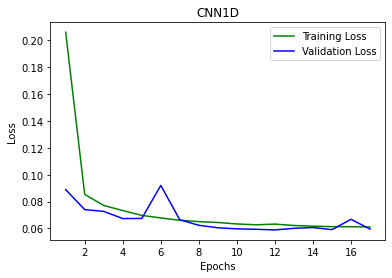

In [35]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 18)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN1D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

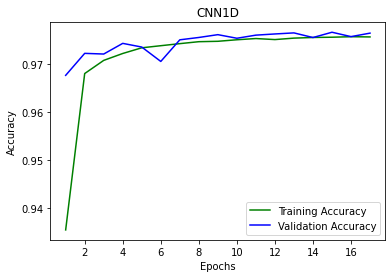

In [36]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 18)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN1D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

6903/6903 [==============================] - 51s 7ms/step


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))


Testing Accuracy: 97.66

Precision: 97.28
Recall: 97.66
F1-score: 97.17



In [69]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
# print(cm)

[[54705     0     0     0     0    39     0   331    19     6     7     2
     13     0     0]
 [    0 80720     0     0     1     0     0     0     0     0     0     0
     21     0     0]
 [    0     1  3997     4    27     0     0     0     0     0     0     0
      9     0     0]
 [    0     0     1   319  1713     0     0     0     0     0     0     0
      2     0     0]
 [   10     0     2   142 18235     0     0     0     1     0     0     0
     34     0     0]
 [   57     0     0     0     0 16370    16     0    14     1     0     0
      0     0     0]
 [   13     0     0     0     0     3  1231     0     4     0     0     0
      0     0     0]
 [   33     0     0     0     0     1     0  3376   314     0    15     0
      0     0     0]
 [  269     0     0     0     0     5     1     4  3603    31   209     0
      0     0     0]
 [   24     0     0     0     0     4     0     7   492    49  1011     0
      0     0     0]
 [   37     0     0     0     0     2     1    11 

In [60]:
np.unique(y_test)

array([ 0.,  1.,  2.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       15., 16.])

In [62]:
np.unique(y_pred_classes)

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16],
      dtype=int64)

In [61]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes, target_names=['Normal','DDoS','DoS','MITM ARP Spoofing','Mirai',
            'Sparta','Theft','Attack','C&C','FileDownload','HeartBeat','Okiru',
            'Reconnaissance','Torii','Flood'])

print(report)

                   precision    recall  f1-score   support

           Normal       0.99      0.99      0.99     55122
             DDoS       1.00      1.00      1.00     80742
              DoS       0.97      0.99      0.98      4038
MITM ARP Spoofing       0.69      0.16      0.26      2035
            Mirai       0.91      0.99      0.95     18424
           Sparta       1.00      0.99      1.00     16458
            Theft       0.99      0.98      0.98      1251
           Attack       0.91      0.90      0.90      3739
              C&C       0.81      0.87      0.84      4122
     FileDownload       0.36      0.03      0.06      1587
        HeartBeat       0.66      0.96      0.78      2530
            Okiru       0.82      0.33      0.47        27
   Reconnaissance       1.00      0.99      1.00     27656
            Torii       1.00      1.00      1.00       414
            Flood       1.00      1.00      1.00      2747

         accuracy                           0.98    22

In [64]:
num_classes = len(np.unique(y_test))
accuracy = np.zeros(num_classes)
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

for i in range(num_classes):
    tp[i] = cm[i, i]
    tn[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp[i] = np.sum(cm[:, i]) - cm[i, i]
    fn[i] = np.sum(cm[i, :]) - cm[i, i]
    accuracy[i] = (tp[i] + tn[i]) / np.sum(cm)
    
category = ['Normal','DDoS','DoS','MITM ARP Spoofing','Mirai',
            'Sparta','Theft','Attack','C&C','FileDownload','HeartBeat','Okiru',
            'Reconnaissance','Torii','Flood']

model_test_scores = pd.DataFrame(list(zip(category,accuracy,tp,tn,fp,fn)), columns = ['Category', \
                                'Accuracy', 'TPR','TNR', 'FPR', 'FNR'])
display(model_test_scores)

,Category,Accuracy,TPR,TNR,FPR,FNR
0,Normal,0.996075,54705.0,165320.0,450.0,417.0
1,DDoS,0.999864,80720.0,140142.0,8.0,22.0
2,DoS,0.999307,3997.0,216742.0,112.0,41.0
3,MITM ARP Spoofing,0.991571,319.0,218711.0,146.0,1716.0
4,Mirai,0.991222,18235.0,200718.0,1750.0,189.0
5,Sparta,0.999289,16370.0,204365.0,69.0,88.0
6,Theft,0.999828,1231.0,219623.0,18.0,20.0
7,Attack,0.996759,3376.0,216800.0,353.0,363.0
8,C&C,0.993807,3603.0,215921.0,849.0,519.0
9,FileDownload,0.992634,49.0,219216.0,89.0,1538.0


In [66]:
cnn2d = Sequential()
cnn2d.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same', input_shape=(8, 8, 1)))
cnn2d.add(LayerNormalization())
cnn2d.add(AveragePooling2D())
cnn2d.add(layers.SpatialDropout2D(0.05))
cnn2d.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'))
cnn2d.add(LayerNormalization())
cnn2d.add(AveragePooling2D())
cnn2d.add(layers.SpatialDropout2D(0.05))
cnn2d.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'))
cnn2d.add(LayerNormalization())
cnn2d.add(AveragePooling2D())
cnn2d.add(layers.SpatialDropout2D(0.05))
cnn2d.add(Conv2D(filters=256, kernel_size=(5,5), activation='relu', padding='same'))
cnn2d.add(LayerNormalization())
cnn2d.add(layers.SpatialDropout2D(0.05))
cnn2d.add(Flatten())
cnn2d.add(Dense(512, activation='relu'))
cnn2d.add(Dense(units=17, activation='softmax'))

cnn2d.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

X_train = X_train.reshape(X_train.shape[0], 8, 8, 1)

X_val = X_val.reshape(X_val.shape[0],  8, 8, 1)

X_test = X_test.reshape(X_test.shape[0],  8, 8, 1)

# X_train = np.reshape(X_train, (X_train.shape[0], 64))

In [67]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(662673, 8, 8, 1)
(220892, 8, 8, 1)
(220892, 8, 8, 1)


In [70]:
from keras.callbacks import EarlyStopping
print(X_train.shape)
history = cnn2d.fit(X_train, y_train, epochs=25, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

(662673, 8, 8, 1)
Epoch 1/25
20709/20709 [==============================] - 910s 44ms/step - loss: 0.1964 - accuracy: 0.9368 - val_loss: 0.1321 - val_accuracy: 0.9549
Epoch 2/25
20709/20709 [==============================] - 991s 48ms/step - loss: 0.1376 - accuracy: 0.9526 - val_loss: 0.1191 - val_accuracy: 0.9599
Epoch 3/25
20709/20709 [==============================] - 969s 47ms/step - loss: 0.1199 - accuracy: 0.9574 - val_loss: 0.1003 - val_accuracy: 0.9605
Epoch 4/25
20709/20709 [==============================] - 961s 46ms/step - loss: 0.1094 - accuracy: 0.9606 - val_loss: 0.1001 - val_accuracy: 0.9627
Epoch 5/25
20709/20709 [==============================] - 1026s 50ms/step - loss: 0.1021 - accuracy: 0.9626 - val_loss: 0.1006 - val_accuracy: 0.9646
Epoch 6/25
20709/20709 [==============================] - 976s 47ms/step - loss: 0.0968 - accuracy: 0.9644 - val_loss: 0.0878 - val_accuracy: 0.9676
Epoch 7/25
20709/20709 [==============================] - 905s 44ms/step - loss: 0.0923

In [75]:
cnn2d.save('CNN2D.h5')

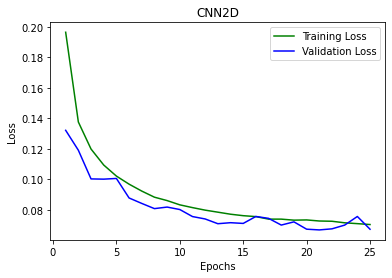

In [72]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 26)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

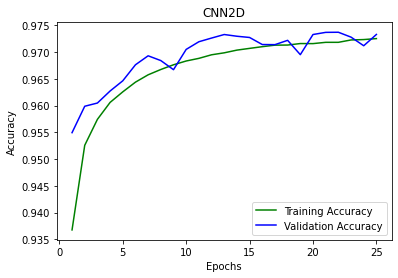

In [73]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 26)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [77]:
y_pred = cnn2d.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

6903/6903 [==============================] - 42s 6ms/step


In [78]:
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))


Testing Accuracy: 97.31

Precision: 96.96
Recall: 97.31
F1-score: 96.99



In [79]:
np.unique(y_test)

array([ 0.,  1.,  2.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       15., 16.])

In [80]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes, target_names=['Normal','DDoS','DoS','MITM ARP Spoofing','Mirai',
            'Sparta','Theft','Attack','C&C','FileDownload','HeartBeat','Okiru',
            'Reconnaissance','Torii','Flood'])

print(report)

                   precision    recall  f1-score   support

           Normal       0.99      0.99      0.99     55122
             DDoS       1.00      1.00      1.00     80742
              DoS       0.93      0.98      0.95      4038
MITM ARP Spoofing       0.51      0.24      0.32      2035
            Mirai       0.92      0.97      0.94     18424
           Sparta       0.99      1.00      0.99     16458
            Theft       0.98      0.93      0.95      1251
           Attack       0.91      0.90      0.90      3739
              C&C       0.81      0.87      0.84      4122
     FileDownload       0.40      0.09      0.15      1587
        HeartBeat       0.65      0.90      0.75      2530
            Okiru       0.82      0.52      0.64        27
   Reconnaissance       0.99      0.99      0.99     27656
            Torii       1.00      1.00      1.00       414
            Flood       1.00      1.00      1.00      2747

         accuracy                           0.97    22

In [81]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
# print(cm)

num_classes = len(np.unique(y_test))
accuracy = np.zeros(num_classes)
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

for i in range(num_classes):
    tp[i] = cm[i, i]
    tn[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp[i] = np.sum(cm[:, i]) - cm[i, i]
    fn[i] = np.sum(cm[i, :]) - cm[i, i]
    accuracy[i] = (tp[i] + tn[i]) / np.sum(cm)
    
category = ['Normal','DDoS','DoS','MITM ARP Spoofing','Mirai',
            'Sparta','Theft','Attack','C&C','FileDownload','HeartBeat','Okiru',
            'Reconnaissance','Torii','Flood']

model_test_scores = pd.DataFrame(list(zip(category,accuracy,tp,tn,fp,fn)), columns = ['Category', \
                                'Accuracy', 'TPR','TNR', 'FPR', 'FNR'])
display(model_test_scores)

,Category,Accuracy,TPR,TNR,FPR,FNR
0,Normal,0.995591,54572.0,165346.0,424.0,550.0
1,DDoS,0.999697,80694.0,140131.0,19.0,48.0
2,DoS,0.998257,3971.0,216536.0,318.0,67.0
3,MITM ARP Spoofing,0.990842,480.0,218389.0,468.0,1555.0
4,Mirai,0.990090,17849.0,200854.0,1614.0,575.0
5,Sparta,0.998660,16379.0,204217.0,217.0,79.0
6,Theft,0.999479,1160.0,219617.0,24.0,91.0
7,Attack,0.996754,3349.0,216826.0,327.0,390.0
8,C&C,0.993716,3596.0,215908.0,862.0,526.0
9,FileDownload,0.992471,145.0,219084.0,221.0,1442.0


In [84]:
#This model was taking a lot of time to run so we had to stop the training

from keras.layers import Conv3D, BatchNormalization, AveragePooling3D, SpatialDropout3D

cnn3d = Sequential()
cnn3d.add(Conv3D(filters=32, kernel_size=(5, 5, 5), activation='relu', padding='same', input_shape=(4, 4, 4, 1)))
cnn3d.add(BatchNormalization())
cnn3d.add(AveragePooling3D())
cnn3d.add(SpatialDropout3D(0.05))

cnn3d.add(Conv3D(filters=64, kernel_size=(5, 5, 5), activation='relu', padding='same'))
cnn3d.add(BatchNormalization())
cnn3d.add(AveragePooling3D())
cnn3d.add(SpatialDropout3D(0.05))

cnn3d.add(Conv3D(filters=128, kernel_size=(5, 5, 5), activation='relu', padding='same'))
cnn3d.add(BatchNormalization())
cnn3d.add(SpatialDropout3D(0.05))

cnn3d.add(Conv3D(filters=256, kernel_size=(5, 5, 5), activation='relu', padding='same'))
cnn3d.add(BatchNormalization())
cnn3d.add(SpatialDropout3D(0.05))
cnn3d.add(Flatten())
cnn3d.add(Dense(512, activation='relu'))
cnn3d.add(Dense(units=17, activation='softmax'))

cnn3d.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

X_train = X_train.reshape(X_train.shape[0], 4, 4, 4, 1)

X_val = X_val.reshape(X_val.shape[0], 4, 4, 4, 1)

X_test = X_test.reshape(X_test.shape[0], 4, 4, 4, 1)

# X_train = np.reshape(X_train, (X_train.shape[0], 64))

In [85]:
from keras.callbacks import EarlyStopping
print(X_train.shape)
history = cnn3d.fit(X_train, y_train, epochs=25, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

(662673, 4, 4, 4, 1)
Epoch 1/25
  115/20709 [..............................] - ETA: 2:08:49 - loss: 1.7466 - accuracy: 0.5250

KeyboardInterrupt: 

In [ ]:
cnn3d.save('CNN3D.h5')

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 18)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN3D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 18)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN3D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))

In [ ]:
np.unique(y_test)

### Binary Classification

In [86]:
X = iot_ds_label.drop(['Label'], axis=1)
X.shape
y=iot_ds_label['Label']
y.shape

(1104446,)

In [87]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

In [88]:
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler.fit(X)
X_normalized = pd.DataFrame(scaler.transform(X), columns=X.columns)
X.update(X_normalized)

In [89]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

In [91]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [92]:
X_train=X_train.drop(features_to_be_dropped, axis=1)
X_test=X_test.drop(features_to_be_dropped, axis=1)
X_val=X_val.drop(features_to_be_dropped, axis=1)

In [93]:
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)

X_val = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)

X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)


In [95]:
from keras.models import load_model, Model

bi_cnn1 = load_model('CNN1D.h5')
bi_cnn1.layers.pop()
bi_cnn1.layers.pop()

bi_cnn1.add(Dense(256, activation='relu'))
bi_cnn1.add(Dense(units=2, activation='softmax'))

for layer in bi_cnn1.layers[:-2]:
    layer.trainable = False

bi_cnn1.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = bi_cnn1.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), 
            callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

Epoch 1/10
20709/20709 [==============================] - 564s 27ms/step - loss: 0.0744 - accuracy: 0.9752 - val_loss: 0.0239 - val_accuracy: 0.9932
Epoch 2/10
20709/20709 [==============================] - 563s 27ms/step - loss: 0.0232 - accuracy: 0.9931 - val_loss: 0.0211 - val_accuracy: 0.9934
Epoch 3/10
20709/20709 [==============================] - 581s 28ms/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.0208 - val_accuracy: 0.9938
Epoch 4/10
20709/20709 [==============================] - 529s 26ms/step - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.0207 - val_accuracy: 0.9934
Epoch 5/10
20709/20709 [==============================] - 525s 25ms/step - loss: 0.0215 - accuracy: 0.9935 - val_loss: 0.0205 - val_accuracy: 0.9936
Epoch 6/10
20709/20709 [==============================] - 571s 28ms/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 0.0204 - val_accuracy: 0.9941
Epoch 7/10
20709/20709 [==============================] - 645s 31ms/step - loss: 0.0215 - accuracy: 0.9936

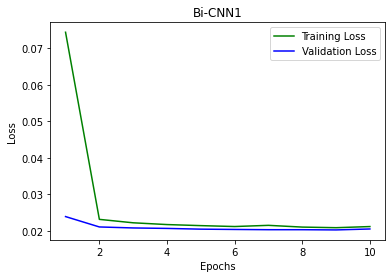

In [96]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 11)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Bi-CNN1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

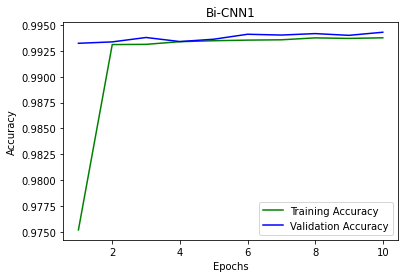

In [98]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Bi-CNN1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [99]:
y_pred = bi_cnn1.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))

6903/6903 [==============================] - 46s 7ms/step

Testing Accuracy: 99.44

Precision: 99.44
Recall: 99.44
F1-score: 99.44



In [100]:
report = classification_report(y_test, y_pred_classes, target_names=['Normal','Anamoly'])

print(report)

              precision    recall  f1-score   support

      Normal       0.99      0.99      0.99     44970
     Anamoly       1.00      1.00      1.00    175920

    accuracy                           0.99    220890
   macro avg       0.99      0.99      0.99    220890
weighted avg       0.99      0.99      0.99    220890



In [101]:
cm = confusion_matrix(y_test, y_pred_classes)
# print(cm)

num_classes = len(np.unique(y_test))
accuracy = np.zeros(num_classes)
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

for i in range(num_classes):
    tp[i] = cm[i, i]
    tn[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp[i] = np.sum(cm[:, i]) - cm[i, i]
    fn[i] = np.sum(cm[i, :]) - cm[i, i]
    accuracy[i] = (tp[i] + tn[i]) / np.sum(cm)
    
category = ['Normal','Anomaly']

model_test_scores = pd.DataFrame(list(zip(category,accuracy,tp,tn,fp,fn)), columns = ['Category', \
                                'Accuracy', 'TPR','TNR', 'FPR', 'FNR'])
display(model_test_scores)

,Category,Accuracy,TPR,TNR,FPR,FNR
0,Normal,0.994445,44315.0,175348.0,572.0,655.0
1,Anomaly,0.994445,175348.0,44315.0,655.0,572.0


In [102]:
X_train = X_train.reshape(X_train.shape[0], 8, 8, 1)

X_val = X_val.reshape(X_val.shape[0],  8, 8, 1)

X_test = X_test.reshape(X_test.shape[0],  8, 8, 1)

In [103]:
bi_cnn2 = load_model('CNN2D.h5')
bi_cnn2.layers.pop()
bi_cnn2.layers.pop()

bi_cnn2.add(Dense(256, activation='relu'))
bi_cnn2.add(Dense(units=2, activation='softmax'))

for layer in bi_cnn2.layers[:-2]:
    layer.trainable = False

bi_cnn2.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = bi_cnn2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), 
            callbacks=[EarlyStopping(monitor='val_loss', patience=2)], verbose=1)

Epoch 1/10
20709/20709 [==============================] - 195s 9ms/step - loss: 0.1378 - accuracy: 0.9491 - val_loss: 0.1240 - val_accuracy: 0.9504
Epoch 2/10
20709/20709 [==============================] - 187s 9ms/step - loss: 0.1153 - accuracy: 0.9501 - val_loss: 0.1034 - val_accuracy: 0.9505
Epoch 3/10
20709/20709 [==============================] - 182s 9ms/step - loss: 0.0861 - accuracy: 0.9616 - val_loss: 0.0679 - val_accuracy: 0.9869
Epoch 4/10
20709/20709 [==============================] - 179s 9ms/step - loss: 0.0556 - accuracy: 0.9861 - val_loss: 0.0431 - val_accuracy: 0.9911
Epoch 5/10
20709/20709 [==============================] - 210s 10ms/step - loss: 0.0395 - accuracy: 0.9916 - val_loss: 0.0324 - val_accuracy: 0.9929
Epoch 6/10
20709/20709 [==============================] - 191s 9ms/step - loss: 0.0334 - accuracy: 0.9931 - val_loss: 0.0287 - val_accuracy: 0.9941
Epoch 7/10
20709/20709 [==============================] - 205s 10ms/step - loss: 0.0304 - accuracy: 0.9933 - va

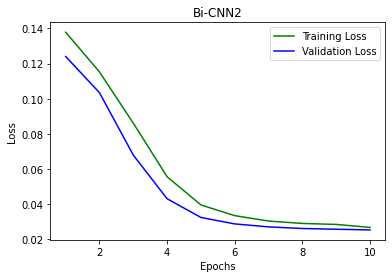

In [104]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 11)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Bi-CNN2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

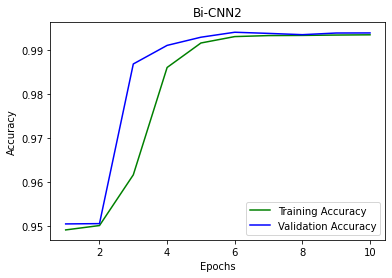

In [105]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Bi-CNN2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [106]:
y_pred = bi_cnn2.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))

6903/6903 [==============================] - 47s 7ms/step

Testing Accuracy: 99.42

Precision: 99.41
Recall: 99.42
F1-score: 99.41



In [107]:
report = classification_report(y_test, y_pred_classes, target_names=['Normal','Anamoly'])

print(report)

              precision    recall  f1-score   support

      Normal       0.99      0.98      0.99     44970
     Anamoly       1.00      1.00      1.00    175920

    accuracy                           0.99    220890
   macro avg       0.99      0.99      0.99    220890
weighted avg       0.99      0.99      0.99    220890



In [108]:
cm = confusion_matrix(y_test, y_pred_classes)
# print(cm)

num_classes = len(np.unique(y_test))
accuracy = np.zeros(num_classes)
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

for i in range(num_classes):
    tp[i] = cm[i, i]
    tn[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp[i] = np.sum(cm[:, i]) - cm[i, i]
    fn[i] = np.sum(cm[i, :]) - cm[i, i]
    accuracy[i] = (tp[i] + tn[i]) / np.sum(cm)
    
category = ['Normal','Anomaly']

model_test_scores = pd.DataFrame(list(zip(category,accuracy,tp,tn,fp,fn)), columns = ['Category', \
                                'Accuracy', 'TPR','TNR', 'FPR', 'FNR'])
display(model_test_scores)

,Category,Accuracy,TPR,TNR,FPR,FNR
0,Normal,0.994151,44145.0,175453.0,467.0,825.0
1,Anomaly,0.994151,175453.0,44145.0,825.0,467.0
